## Introduction

Heart disease is a general term for a range of cardiovascular diseases, with the most common one being Coronary Artery Disease (CAD). According to the CDC, heart disease was the leading cause of death in 2018 and 2019 killing around 650k Americans per year. 

![display_image](https://www.cdc.gov/nchs/images/databriefs/351-400/db395-fig4.gif)

https://www.cdc.gov/nchs/products/databriefs/db395.htm

Most forms of heart diseases are preventable, with the risk being greatly lowered through personal lifestyle changes. If characteristics that represent high risk of heart disease are caught early enough, a candidate can undergo treatment that includes dietary and exercise changes, smoking, and sometimes medicine. In this project, we will be creating a machine learning model with data from 1,025 patients, to predict whether or not a patient has heart disease.

#### The Data

Data used for this analysis is displayed with these 14 columns:
1. age
2. sex
3. cp (chest pain type - 4 values)
4. trestbps (resting blood pressure)
5. chol (serum cholestoral in mg/dl)
6. fbs (fasting blood sugar > 120 mg/dl)
7. restecg (resting electrocardiographic EKG results - values 0,1,2)
8. thalach (maximum heart rate achieved)
9. exang (exercise induced angina chest pain)
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope (the slope of the peak exercise ST segment)
12. ca (number of major vessels (0-3) colored by flourosopy)
13. thal ( 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target (0 - no heart disease, 1 - heart disease)

All data pulled from Kaggle user johnsmith88
https://www.kaggle.com/johnsmith88/heart-disease-dataset

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [77]:
heart = pd.read_csv('heart.csv')

#### Section 1: Data Exploration / Cleaning

Goals of this section are to:
- Ensure that there is no missing data
- Ensure there is no weird or misentered data
- Get a sense of the values in this dataset

In [78]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [79]:
heart.shape

(1025, 14)

In [80]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [81]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [82]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Initial thoughts on data
**Age**: Our dataset for this group is on the old side a mean age of 54 years. This makes sense as it is a dataset of patients who have been evaluated for heart disease, which the risk increases with age. However, this means our dataset is not representative of the general population  
**Sex**: Our dataset is 69.5% male. Males are known to have more problems than women when it comes to heart disease.  
**CP**: Four values of either [0, 1, 2, 3] (not sure what each value means though, but we will check later if this is significant)  
**Trestbps**: Resting blood pressure, with the range of numbers provided, I assume systolic blood pressure is being reported in mmHg. Above 120 is considered having high blood pressure, which a majority of patients have in this dataset  
**Chol**: Assuming the dataset is reporting Total Cholestrol in mg/dl. Over 200 is considered to be High Cholestrol  
**Fbs**: Fasting blood sugar, reports if blood sugar levels are >120 mg/dl, which is categorized as being pre-diabetic or diabetic. About 15% of patients here fall into this category  
**Restecg**: EKG checks for abnormal heartbeat. Split into [0, 1, 2]. However, no legend is given to us as to what these mean.  
**Thalach**: Maximum heart rate achieved. Assuming the patients went through an exercise procedure to get their maximum heart rate evaluated  
**Exang**: Exercise induced chest pain, about 34% of our patients encounter this  
**Oldpeak**: Measure of abnormal heartbeat  
**Slope** Another measure of abnormal heartbeat  
**Ca**: Heart imaging  
**Thal**: Not sure what this is  
**Target**: Our indicator of whether a person has heart disease. 51.3% of the patients in the dataset are reported to have heart disease

### Data Exploration

Let's check if older people in this dataset are more likely to have heart disease

Text(0.5, 1.0, 'Heart Disease Presence by Age')

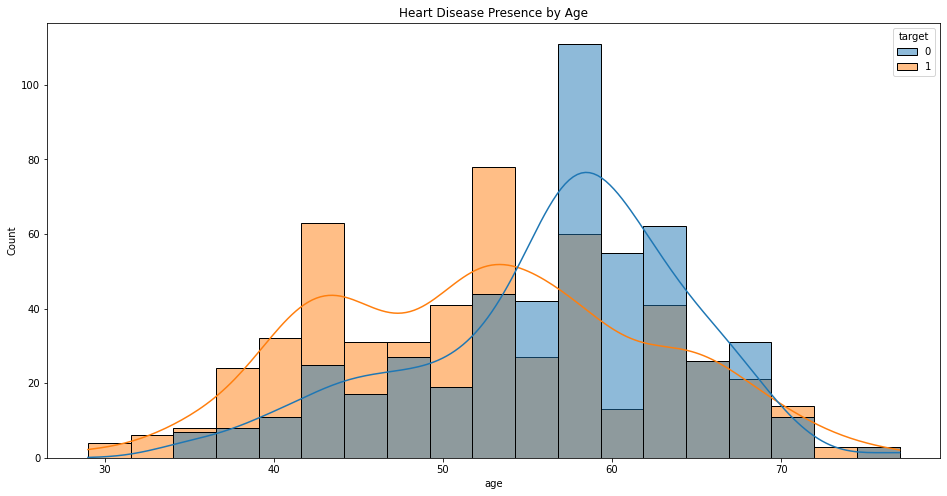

In [83]:
plt.rcParams['figure.figsize'] = [10, 5]
ax = sns.histplot(x='age',data=heart,hue='target',kde=True)
ax.set_title('Heart Disease Presence by Age')

The older the person, the less likely they are to have heart disease. This in itself is false and a large bias of the dataset. I hypothesize that this is because the elderly will get regular check for heart disease, while younger people will not get checked unless they actually experience heart issues. Because of this bias, I will omit using Age in the model of this dataset, since the goal is to model strictly on the data of the heart. **If this model is ever to be used on the general public, it would be incorrect to fit to the trend from the Age data in this dataset**.   

How do the stats look for gender?  

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

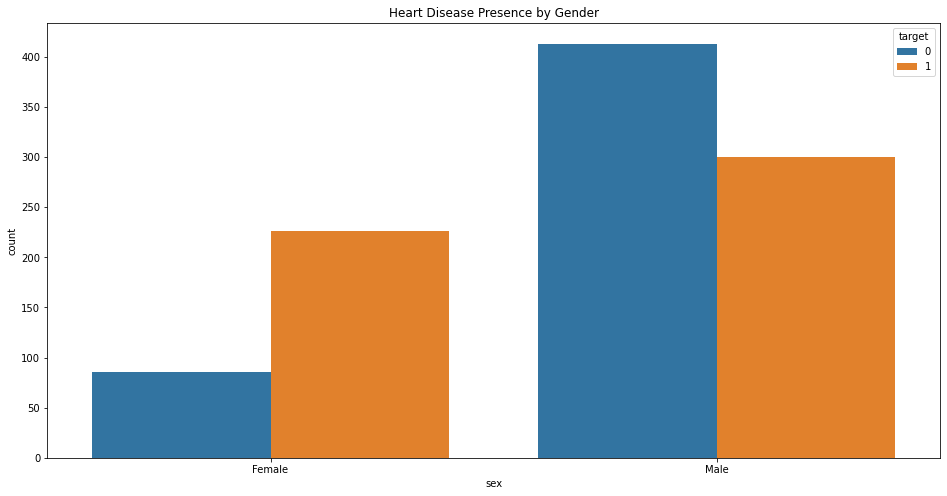

In [84]:
ax = sns.countplot(x='sex',hue='target',data=heart)
ax.set_title('Heart Disease Presence by Gender')
ax.set_xticklabels(['Female','Male'])

We see that a large majority of females in this dataset end up being diagnosed with heart disease, while less than half of males are diagnosed. Like the age column, this effect is not representative of the general population as a whole, and may be due to data sampling biasness. Perhaps less females are evaluated for heart disease out of precauation, just like how younger people are less likely to be evaluated. More investigation will need to be done in the future as to how this dataset was actually curated. However, my takeaway is that if this data was made from precautionary evaluations, **females are very underevaluated for heart disease and should be more frequently evaluated in the future**.  

Just like the Age column, I will be omitting the Sex column because of hypothesized data curation biasness.  

**Because it is now established that this dataset, is not representative of the general population, we must be careful to choose what pieces of information to add into our model to avoid overfitting. I will now continue to check each characteristic to see if the trend for each makes sense**

Text(0.5, 0, 'Max Heart Rate')

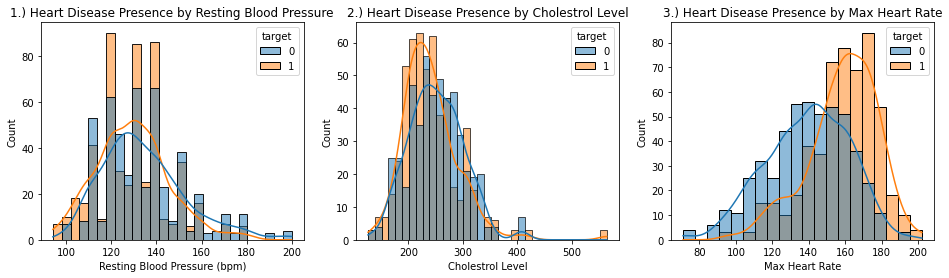

In [85]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.subplot(1,3,1)
ax = sns.histplot(x='trestbps',data=heart,hue='target',kde=True)
ax.set_title('1.) Heart Disease Presence by Resting Blood Pressure')
ax.set_xlabel('Resting Blood Pressure (bpm)')

plt.subplot(1,3,2)
ax = sns.histplot(x='chol',data=heart,hue='target',kde=True)
ax.set_title('2.) Heart Disease Presence by Cholestrol Level')
ax.set_xlabel('Cholestrol Level')

plt.subplot(1,3,3)
ax = sns.histplot(x='thalach',data=heart,hue='target',kde=True)
ax.set_title('3.) Heart Disease Presence by Max Heart Rate')
ax.set_xlabel('Max Heart Rate')

1. Resting Blood Pressure does not seem to have an effect on whether someone has heart disease. Does not really make sense  
2. Lower cholestrol seems to indicate higher chance of heart disease.  Does not make sense
3. Higher max heart rate raises chance of heart disease. Makes sense

Text(0.5, 0, 'Thal???')

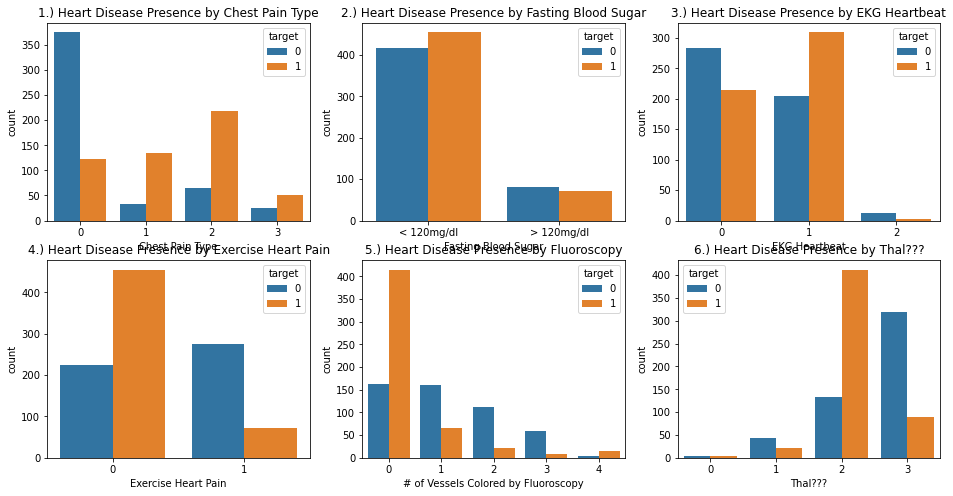

In [86]:
plt.rcParams['figure.figsize'] = [16, 8]

plt.subplot(2,3,1)
ax = sns.countplot(x='cp',hue='target',data=heart)
ax.set_title('1.) Heart Disease Presence by Chest Pain Type')
ax.set_xlabel('Chest Pain Type')

plt.subplot(2,3,2)
ax = sns.countplot(x='fbs',hue='target',data=heart)
ax.set_title('2.) Heart Disease Presence by Fasting Blood Sugar')
ax.set_xlabel('Fasting Blood Sugar')
ax.set_xticklabels(['< 120mg/dl','> 120mg/dl'])

plt.subplot(2,3,3)
ax = sns.countplot(x='restecg',hue='target',data=heart)
ax.set_title('3.) Heart Disease Presence by EKG Heartbeat')
ax.set_xlabel('EKG Heartbeat')

plt.subplot(2,3,4)
ax = sns.countplot(x='exang',hue='target',data=heart)
ax.set_title('4.) Heart Disease Presence by Exercise Heart Pain')
ax.set_xlabel('Exercise Heart Pain')

plt.subplot(2,3,5)
ax = sns.countplot(x='ca',hue='target',data=heart)
ax.set_title('5.) Heart Disease Presence by Fluoroscopy')
ax.set_xlabel('# of Vessels Colored by Fluoroscopy')

plt.subplot(2,3,6)
ax = sns.countplot(x='thal',hue='target',data=heart)
ax.set_title('6.) Heart Disease Presence by Thal???')
ax.set_xlabel('Thal???')

1. It seems safe to assume that a value of 0 indicates no chest pain. If this is true, the resulting data makes sense
2. Lower blood sugar slightly correlates with no heart disease. Does not really make sense
3. Assuming 0 means no abnormal heartbeat. Makes sense.
4. Initially would assume 0 means no heart pain. 0 strongly correlates with presence of heart disease. We would expect presence of heart pain to correlate with presence of heart disease. Perhaps 0 means heart pain, but data is unlabelled so I don't know for sure
5. The more vessels that are colored by fluoroscopy, the less chance of heart disease. Will have to ask a doctor whether this makes sense
6. Not sure what this data is, but there is a very strong correlation here

Text(0.5, 0, 'EKG Slope')

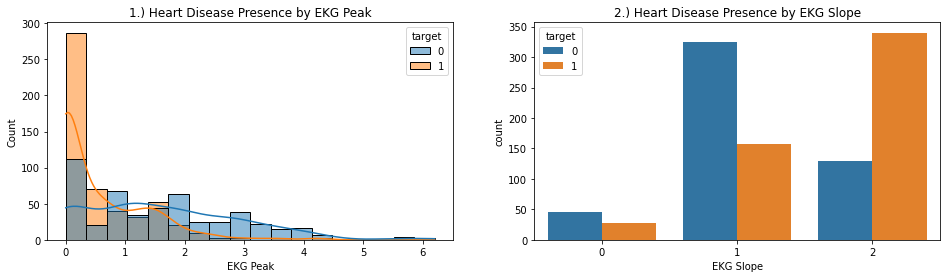

In [87]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.subplot(1,2,1)
ax = sns.histplot(x='oldpeak',data=heart,hue='target',kde=True)
ax.set_title('1.) Heart Disease Presence by EKG Peak')
ax.set_xlabel('EKG Peak')

plt.subplot(1,2,2)
ax = sns.countplot(x='slope',data=heart,hue='target')
ax.set_title('2.) Heart Disease Presence by EKG Slope')
ax.set_xlabel('EKG Slope')

Will have to ask a doctor (or Google) as to whether these make sense 

#### Takeaways from these graphs

I am not confident that building a model off of the data presented would be trustworthy enough to be applied to the real world. From looking at the correlations independently, there are some questionable results. **It seems that the data produced in this dataset was taken from patients that already had a reason to have their heart evaluated**. This could accurately capture heart disease for patients that experience noticeable symptoms like abnormal heart behavior. On the other hand, it could miss unnoticeable symptoms that quietly develop over time, like high blood pressure or coronary artery disease. Additionally, we do not know what type of heart disease each of the patients with heart disease actually have. **This dataset can skew towards a specific type of heart disease that is not representative of the actual percentages of heart disease in the general population. Therefore it model may overfit and end up not being a model to predict "heart disease" as a whole, but rather the specific type of heart disease that is overrepresented with this data**.  

To raise confidence in this model, I would request these few improvements to the dataset:

1. "Heart disease" is too broad of a designation for an accurate model. This dataset provides risk factors that are unique to different types of heart disease. Although I am not an expert on this subject and therefore I don't know how different types of heart characteristics relate to one another, it seems to me that certain types of heart disease can be very independent from one another. It would be better to be able to narrow down this designation into multiple categories (abnormal heartbeat, atherosclerosis etc.)
2. There should be some sort of sampling from the general population if possible. This dataset seems very focused on people with pre-existing conditions, and people already in higher risk demographics (age/gender). Someone that is unlike the typical person evaluated in this dataset can give different results
3. Investigation into the sampling methods that produce this data, is it repeatable? For example, do subjects go through the same amount of exercise to produce the data that has to do with exercise?  

However for now, I will continue on to produce a model based off of the current data from this data set. Although it will not be representative of the general population, I believe it could still be useful for future patients that fall into the same demographics as the ones represented in this test, and the qualifications and reasons to be evaluated in the first place stay the exact same as it was when this data was produced.


### Building a Model

There are a few different options that we can use for a classification algorithm:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. k-Nearest Neighbors

We will run each of these algorithms and see which gives the best predictive score

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

First we will need to decide which parameters we will be modeling on. I stated previously that there are a few parameters whose correlations do not make sense when related to heart disease. The two I will omit for now are Age and Gender. However, I will be keeping other parameters in, since the goal is now not to create a model for the general public for heart disease, but rather people of similar demographic of the ones sampled to predict their risk of whatever disease is disproportionately captured in this data.

In [113]:
X_data = heart.drop(['age','sex','target'],axis=1)
y_data = heart['target']
scaler = StandardScaler()
X_data_std = scaler.fit_transform(X_data)
X_train, X_test, y_train, y_test = train_test_split(X_data_std,y_data,test_size=0.2,random_state=2)

#### Logistic Regression

In [114]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
LR_accuracy = accuracy_score(y_test,y_predict)
print(LR_accuracy)

0.8731707317073171


#### Decision Tree

In [115]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
DT_accuracy = accuracy_score(y_test,y_predict)
print(DT_accuracy)

0.9853658536585366


#### Random Forest

In [116]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
RF_accuracy = accuracy_score(y_test,y_predict)
print(RF_accuracy)

1.0


In [117]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
KN_accuracy = accuracy_score(y_test,y_predict)
print(KN_accuracy)

0.7902439024390244
